In [209]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.tsa.api as sm

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [210]:
History_Data['Hour'] = History_Data['Hour'] - 1

In [211]:
History_Data['Year'] = History_Data['Year'].astype(str)
History_Data['Month'] = History_Data['Month'].astype(str)
History_Data['Day'] = History_Data['Day'].astype(str)
History_Data['Hour'] = History_Data['Hour'].astype(str)
History_Data['Datetime'] = (History_Data['Year']) +'-' + (History_Data['Month']) +'-' + (History_Data['Day']) \
                           + '-' + (History_Data['Hour'])

In [212]:
History_Data= History_Data.dropna()

In [213]:
History_Data.drop('Year', axis =1 , inplace= True)
History_Data.drop('Month', axis =1 , inplace= True)
History_Data.drop('Day', axis =1 , inplace= True)
History_Data.drop('Hour', axis =1 , inplace= True)
History_Data['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 

train=History_Data.iloc[0:17520,:]
test=History_Data.iloc[17520:26303,:]

In [214]:
History_Data[History_Data['Timestamp'] >= '2004-01-01']

,T,Load_kW,Datetime,Timestamp
17520,46.0,251611.0,2004-1-1-0,2004-01-01 00:00:00
17521,45.0,246499.0,2004-1-1-1,2004-01-01 01:00:00
17522,43.0,239736.0,2004-1-1-2,2004-01-01 02:00:00
17523,43.0,235836.0,2004-1-1-3,2004-01-01 03:00:00
17524,43.0,239219.0,2004-1-1-4,2004-01-01 04:00:00
17525,42.0,249191.0,2004-1-1-5,2004-01-01 05:00:00
17526,40.0,263114.0,2004-1-1-6,2004-01-01 06:00:00
17527,41.0,281236.0,2004-1-1-7,2004-01-01 07:00:00
17528,48.0,306074.0,2004-1-1-8,2004-01-01 08:00:00
17529,56.0,313494.0,2004-1-1-9,2004-01-01 09:00:00


In [215]:
year2002_data = History_Data.iloc[0:8760,:]
year2003_data = History_Data.iloc[8760:17520,:]
print(year2002_data.shape)
print(year2003_data.shape)
print(test.shape)
print(test.shape)
print(test.shape)

(8760, 4)
(8760, 4)
(8783, 4)
(8783, 4)
(8783, 4)


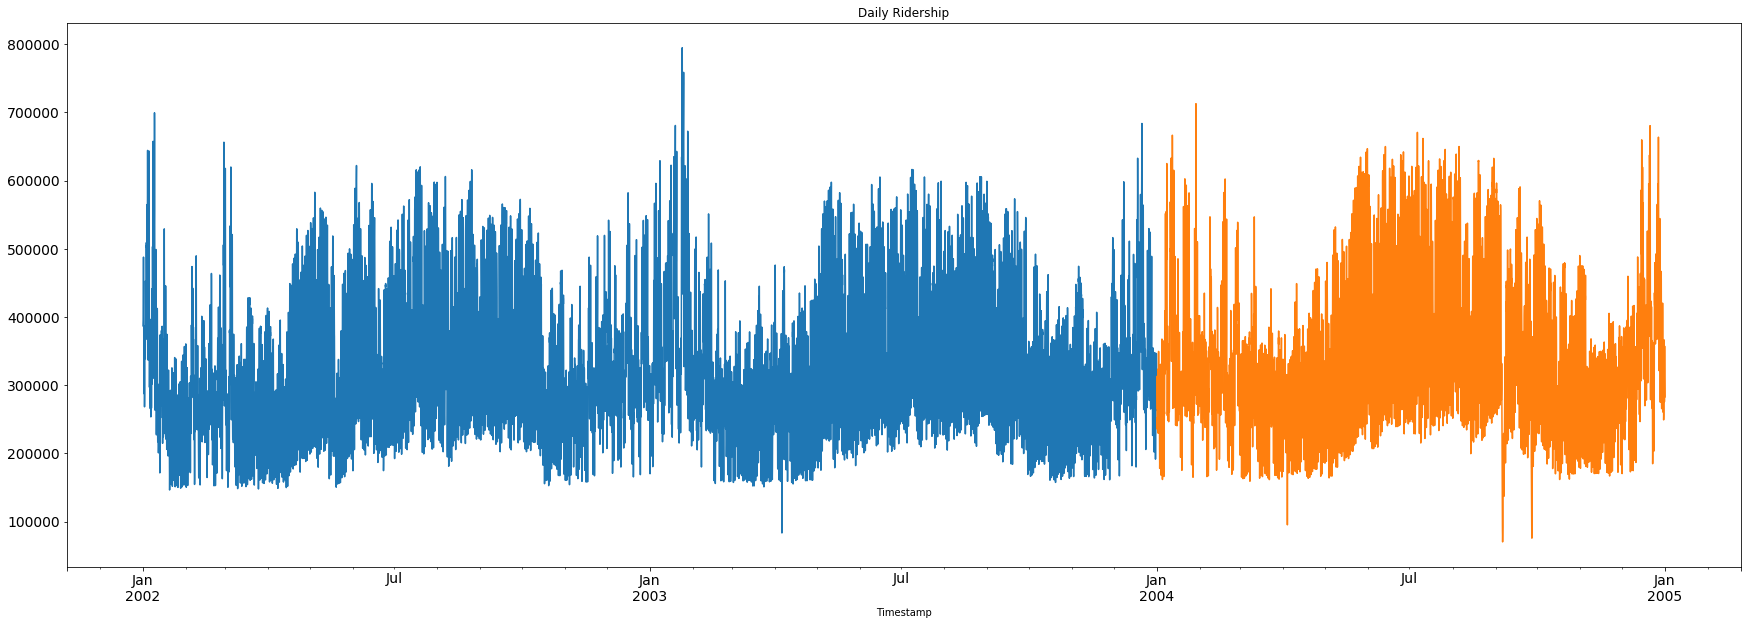

In [216]:
History_Data.index = History_Data.Timestamp 
train.index = train.Timestamp 
test.index = test.Timestamp 
train['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
test['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [217]:
year2002_data.head(2)

,T,Load_kW,Datetime,Timestamp
0,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00
1,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00


In [218]:
year2003_data.head(2)

,T,Load_kW,Datetime,Timestamp
8760,61.0,205874.0,2003-1-1-0,2003-01-01 00:00:00
8761,61.0,190513.0,2003-1-1-1,2003-01-01 01:00:00


In [219]:
year2003_data = year2003_data.reset_index()
year2003_data = year2003_data.drop('index', axis  = 1)
year2003_data

,T,Load_kW,Datetime,Timestamp
0,61.0,205874.0,2003-1-1-0,2003-01-01 00:00:00
1,61.0,190513.0,2003-1-1-1,2003-01-01 01:00:00
2,62.0,176767.0,2003-1-1-2,2003-01-01 02:00:00
3,62.0,170318.0,2003-1-1-3,2003-01-01 03:00:00
4,61.0,170551.0,2003-1-1-4,2003-01-01 04:00:00
5,60.0,178139.0,2003-1-1-5,2003-01-01 05:00:00
6,59.0,190345.0,2003-1-1-6,2003-01-01 06:00:00
7,59.0,207088.0,2003-1-1-7,2003-01-01 07:00:00
8,62.0,232549.0,2003-1-1-8,2003-01-01 08:00:00
9,65.0,257571.0,2003-1-1-9,2003-01-01 09:00:00


In [220]:
diff_DF = pd.merge(year2002_data, year2003_data, left_index= True, right_index= True)
diff_DF['Load_diff'] = diff_DF['Load_kW_y'] - diff_DF['Load_kW_x']
diff_DF['Load_mean'] = (diff_DF['Load_kW_y'] + diff_DF['Load_kW_x']) / 2
diff_DF

,T_x,Load_kW_x,Datetime_x,Timestamp_x,T_y,Load_kW_y,Datetime_y,Timestamp_y,Load_diff,Load_mean
0,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00,61.0,205874.0,2003-1-1-0,2003-01-01 00:00:00,-181316.0,296532.0
1,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00,61.0,190513.0,2003-1-1-1,2003-01-01 01:00:00,-199464.0,290245.0
2,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00,62.0,176767.0,2003-1-1-2,2003-01-01 02:00:00,-215114.0,284324.0
3,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00,62.0,170318.0,2003-1-1-3,2003-01-01 03:00:00,-226044.0,283340.0
4,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00,61.0,170551.0,2003-1-1-4,2003-01-01 04:00:00,-238002.0,289552.0
5,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00,60.0,178139.0,2003-1-1-5,2003-01-01 05:00:00,-248763.0,302520.5
6,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00,59.0,190345.0,2003-1-1-6,2003-01-01 06:00:00,-258794.0,319742.0
7,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00,59.0,207088.0,2003-1-1-7,2003-01-01 07:00:00,-266337.0,340256.5
8,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00,62.0,232549.0,2003-1-1-8,2003-01-01 08:00:00,-255372.0,360235.0
9,40.0,472487.0,2002-1-1-9,2002-01-01 09:00:00,65.0,257571.0,2003-1-1-9,2003-01-01 09:00:00,-214916.0,365029.0


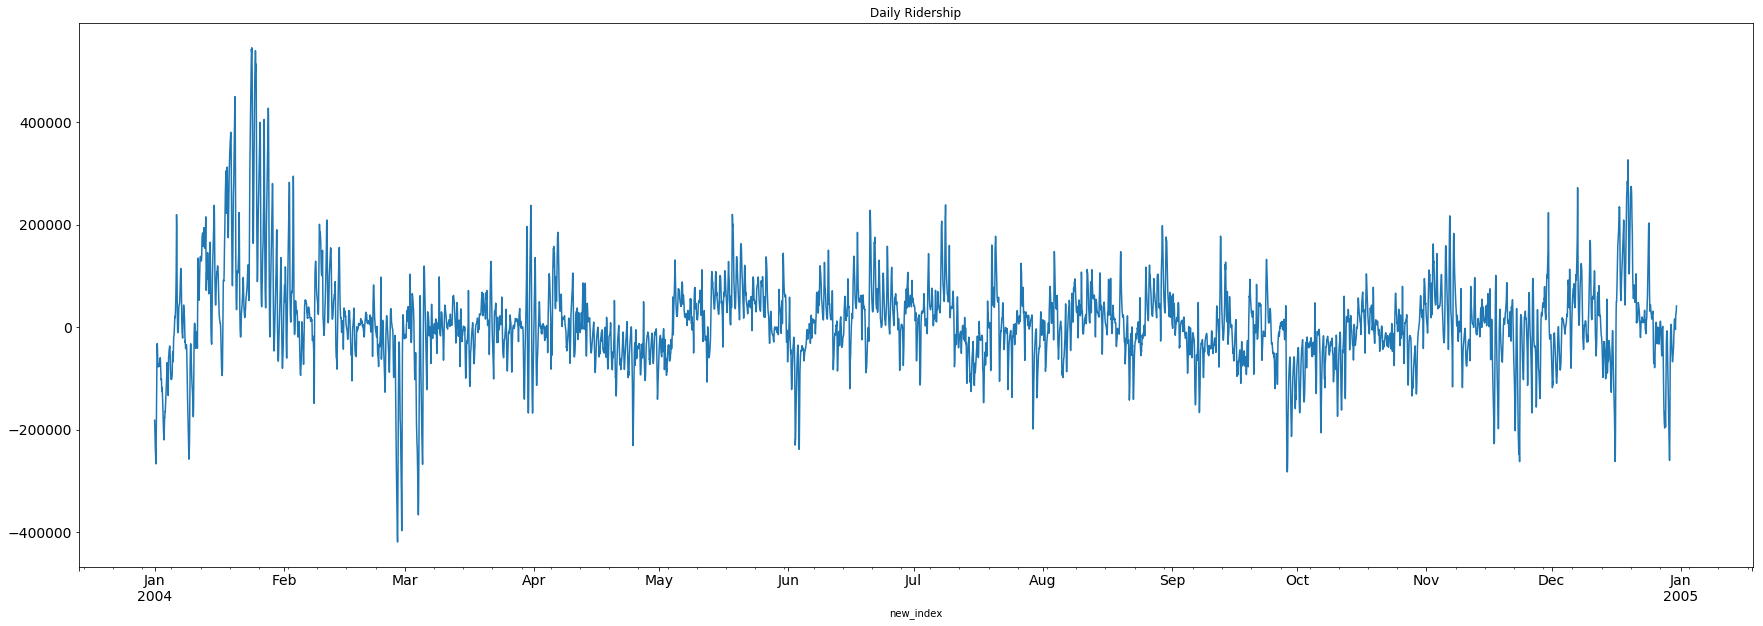

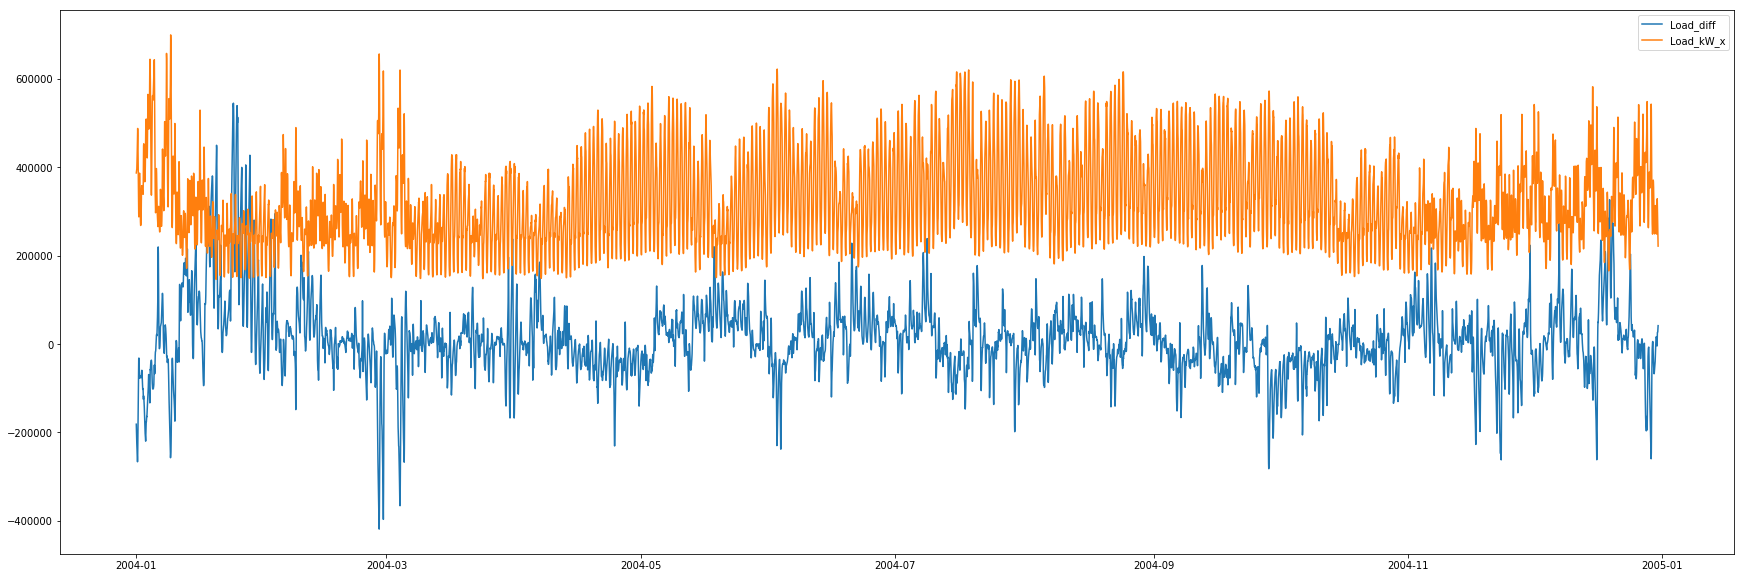

In [270]:
diff_DF['Load_diff'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
plt.figure(figsize=(30,10))

plt.plot(diff_DF['Load_diff'], label='Load_diff')
plt.plot(diff_DF['Load_kW_x'], label='Load_kW_x')
#plt.plot(diff_DF['Load_kW_y'], label='Load_kW_y')

plt.legend(loc='best')

In [222]:
diff_DF['Load_diff'].mean()

9861.024714611873

In [223]:
diff_DF = diff_DF.set_index('Timestamp_y')


,T_x,Load_kW_x,Datetime_x,Timestamp_x,T_y,Load_kW_y,Datetime_y,Load_diff,Load_mean
Timestamp_y,,,,,,,,,
2003-01-01 00:00:00,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00,61.0,205874.0,2003-1-1-0,-181316.0,296532.0
2003-01-01 01:00:00,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00,61.0,190513.0,2003-1-1-1,-199464.0,290245.0
2003-01-01 02:00:00,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00,62.0,176767.0,2003-1-1-2,-215114.0,284324.0
2003-01-01 03:00:00,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00,62.0,170318.0,2003-1-1-3,-226044.0,283340.0
2003-01-01 04:00:00,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00,61.0,170551.0,2003-1-1-4,-238002.0,289552.0
2003-01-01 05:00:00,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00,60.0,178139.0,2003-1-1-5,-248763.0,302520.5
2003-01-01 06:00:00,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00,59.0,190345.0,2003-1-1-6,-258794.0,319742.0
2003-01-01 07:00:00,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00,59.0,207088.0,2003-1-1-7,-266337.0,340256.5
2003-01-01 08:00:00,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00,62.0,232549.0,2003-1-1-8,-255372.0,360235.0


In [256]:
diff_DF = diff_DF.reset_index()

In [257]:
diff_DF

,Timestamp_y,T_x,Load_kW_x,Datetime_x,Timestamp_x,T_y,Load_kW_y,Datetime_y,Load_diff,Load_mean
0,2003-01-01 00:00:00,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00,61.0,205874.0,2003-1-1-0,-181316.0,296532.0
1,2003-01-01 01:00:00,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00,61.0,190513.0,2003-1-1-1,-199464.0,290245.0
2,2003-01-01 02:00:00,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00,62.0,176767.0,2003-1-1-2,-215114.0,284324.0
3,2003-01-01 03:00:00,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00,62.0,170318.0,2003-1-1-3,-226044.0,283340.0
4,2003-01-01 04:00:00,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00,61.0,170551.0,2003-1-1-4,-238002.0,289552.0
5,2003-01-01 05:00:00,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00,60.0,178139.0,2003-1-1-5,-248763.0,302520.5
6,2003-01-01 06:00:00,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00,59.0,190345.0,2003-1-1-6,-258794.0,319742.0
7,2003-01-01 07:00:00,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00,59.0,207088.0,2003-1-1-7,-266337.0,340256.5
8,2003-01-01 08:00:00,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00,62.0,232549.0,2003-1-1-8,-255372.0,360235.0
9,2003-01-01 09:00:00,40.0,472487.0,2002-1-1-9,2002-01-01 09:00:00,65.0,257571.0,2003-1-1-9,-214916.0,365029.0


In [259]:
from datetime import datetime
from datetime import timedelta
diff_DF['new_index'] = diff_DF['Timestamp_y'] + timedelta(365)
diff_DF = diff_DF.set_index('new_index')
diff_DF

,Timestamp_y,T_x,Load_kW_x,Datetime_x,Timestamp_x,T_y,Load_kW_y,Datetime_y,Load_diff,Load_mean
new_index,,,,,,,,,,
2004-01-01 00:00:00,2003-01-01 00:00:00,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00,61.0,205874.0,2003-1-1-0,-181316.0,296532.0
2004-01-01 01:00:00,2003-01-01 01:00:00,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00,61.0,190513.0,2003-1-1-1,-199464.0,290245.0
2004-01-01 02:00:00,2003-01-01 02:00:00,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00,62.0,176767.0,2003-1-1-2,-215114.0,284324.0
2004-01-01 03:00:00,2003-01-01 03:00:00,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00,62.0,170318.0,2003-1-1-3,-226044.0,283340.0
2004-01-01 04:00:00,2003-01-01 04:00:00,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00,61.0,170551.0,2003-1-1-4,-238002.0,289552.0
2004-01-01 05:00:00,2003-01-01 05:00:00,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00,60.0,178139.0,2003-1-1-5,-248763.0,302520.5
2004-01-01 06:00:00,2003-01-01 06:00:00,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00,59.0,190345.0,2003-1-1-6,-258794.0,319742.0
2004-01-01 07:00:00,2003-01-01 07:00:00,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00,59.0,207088.0,2003-1-1-7,-266337.0,340256.5
2004-01-01 08:00:00,2003-01-01 08:00:00,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00,62.0,232549.0,2003-1-1-8,-255372.0,360235.0


In [ ]:
#----------------------------------------------------------------------

In [261]:
y_hat_avg = test[['Load_kW', 'Timestamp']]
y_hat_avg['Holt_Winter'] = pd.merge(y_hat_avg, diff_DF, how = 'inner',
                     left_index= True, right_index= True)['Load_mean'] + 9861.024714611873
y_hat_avg

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Load_kW,Timestamp,Holt_Winter
Timestamp,,,
2004-01-01 00:00:00,251611.0,2004-01-01 00:00:00,306393.024715
2004-01-01 01:00:00,246499.0,2004-01-01 01:00:00,300106.024715
2004-01-01 02:00:00,239736.0,2004-01-01 02:00:00,294185.024715
2004-01-01 03:00:00,235836.0,2004-01-01 03:00:00,293201.024715
2004-01-01 04:00:00,239219.0,2004-01-01 04:00:00,299413.024715
2004-01-01 05:00:00,249191.0,2004-01-01 05:00:00,312381.524715
2004-01-01 06:00:00,263114.0,2004-01-01 06:00:00,329603.024715
2004-01-01 07:00:00,281236.0,2004-01-01 07:00:00,350117.524715
2004-01-01 08:00:00,306074.0,2004-01-01 08:00:00,370096.024715


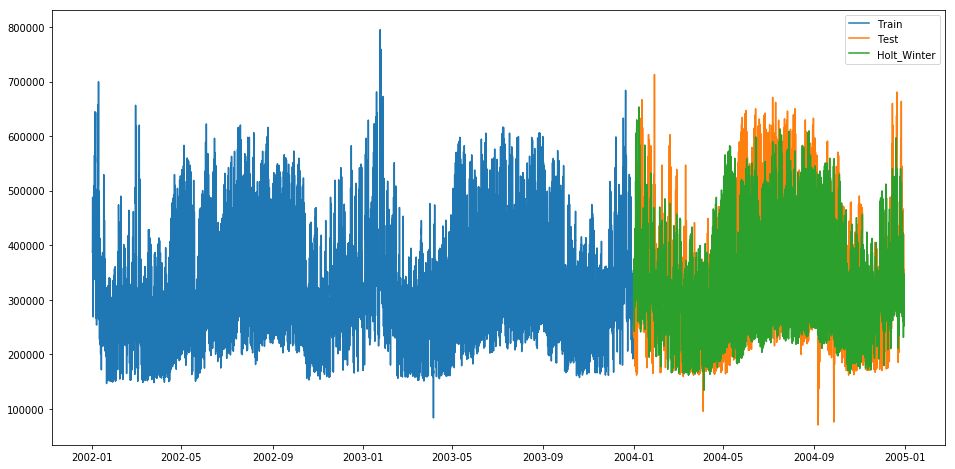

In [268]:
plt.figure(figsize=(16,8))

y_hat_avg = y_hat_avg.dropna()

plt.plot(train['Load_kW'], label='Train')
plt.plot(y_hat_avg['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [269]:
rms = sqrt(mean_squared_error(y_hat_avg['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
mape = mean_absolute_percentage_error(y_hat_avg['Load_kW'], y_hat_avg['Holt_Winter'])
print(mape)

75099.22636602315
16.77314267844435


In [ ]:
#-----------------------------------------------------------------------------
#-------------BELOW IS FORMAL-------------------------------------------------
#-----------------------------------------------------------------------------

In [117]:
#History_Data[History_Data['Timestamp'] >= '2003-01-01']

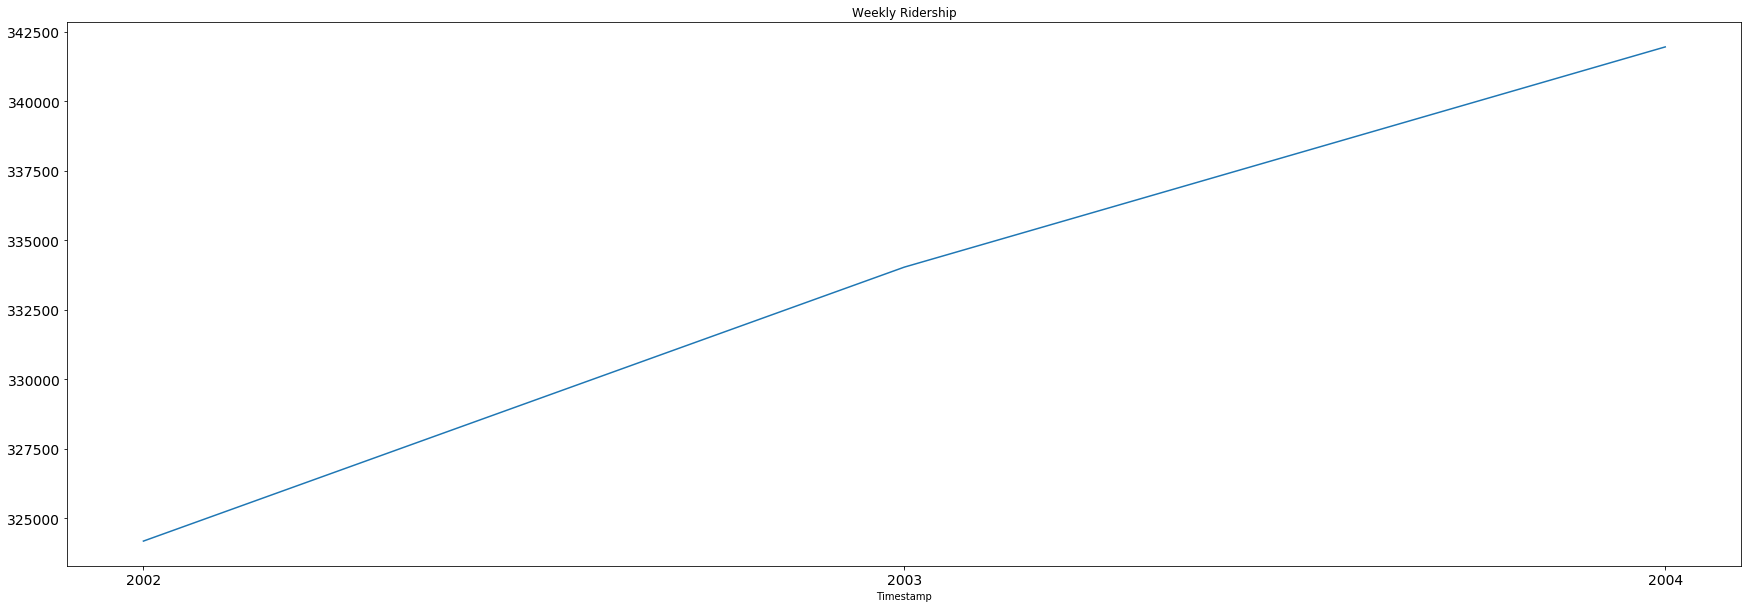

In [69]:
Valid_Data = History_Data.copy()
Valid_Data = Valid_Data.resample('y').mean()
Valid_Data['Load_kW'].plot(figsize=(30,10), title= 'Weekly Ridership', fontsize=14)

In [70]:
Valid_Data

,T,Load_kW
Timestamp,,
2002-12-31,68.087158,324173.996918
2003-12-31,67.087900,334035.021632
2004-12-31,67.774533,341961.405453


In [74]:
slope1 = Valid_Data.iloc[1,1] - Valid_Data.iloc[0,1]
print(slope1)
slope2 = Valid_Data.iloc[2,1] - Valid_Data.iloc[1,1]
print(slope2)

9861.024714611878
7926.383820676478


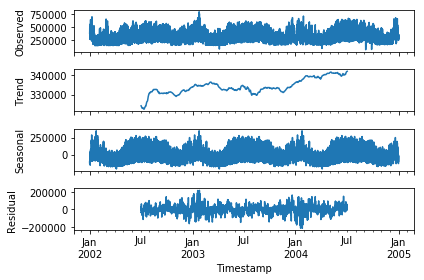

In [54]:
numer_freq = 365 * 24
Valid_Data = History_Data.copy()

yearly_components = sm.seasonal_decompose(Valid_Data['Load_kW'], freq= numer_freq).plot()
yearly_components = sm.seasonal_decompose(Valid_Data['Load_kW'], freq= numer_freq)

yearly_components_trend = yearly_components.trend

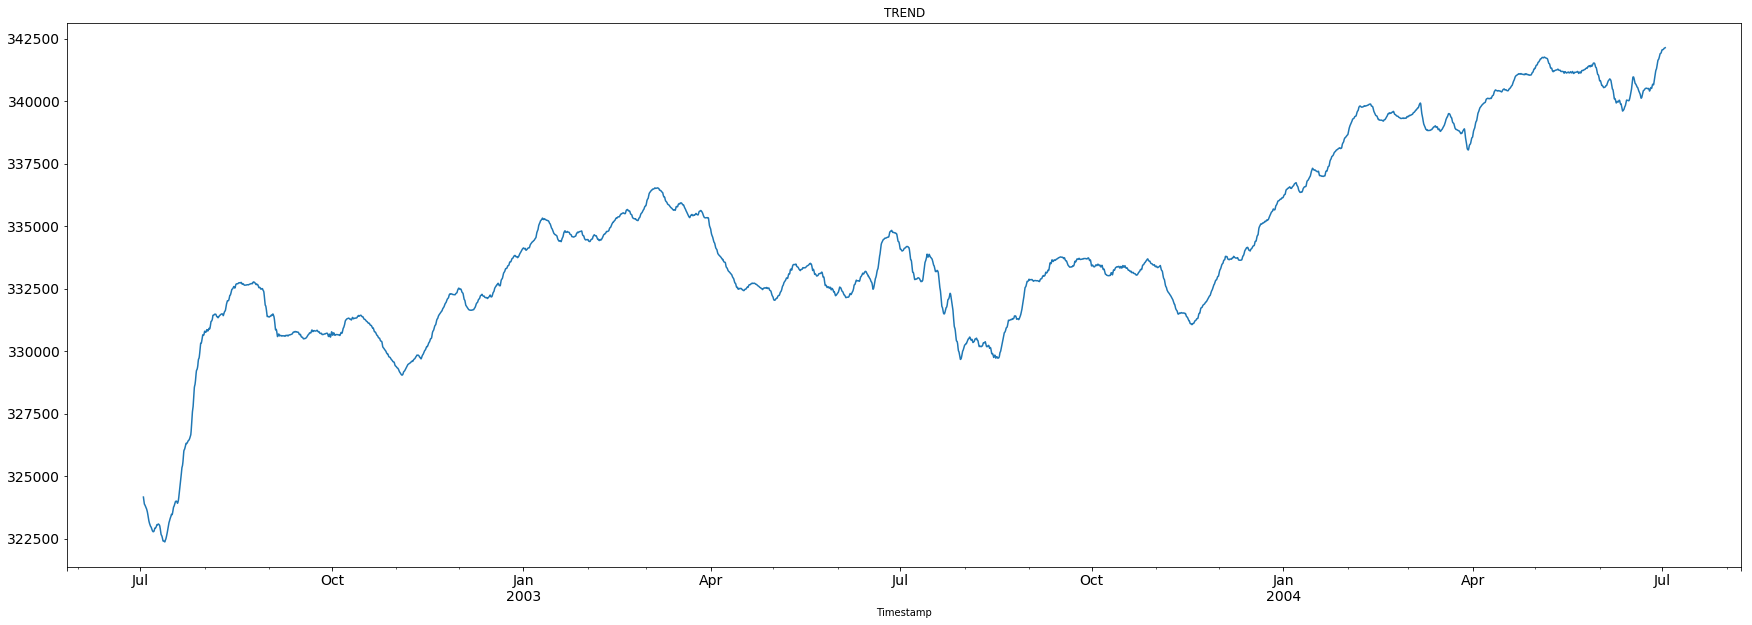

In [55]:
(yearly_components.trend).plot(figsize=(30,10), title= 'TREND', fontsize=14)

In [59]:
temp = pd.DataFrame(yearly_components_trend)
temp= temp.dropna()
temp

,Load_kW
Timestamp,
2002-07-02 12:00:00,324163.647831
2002-07-02 13:00:00,324141.913813
2002-07-02 14:00:00,324118.250685
2002-07-02 15:00:00,324093.070434
2002-07-02 16:00:00,324066.583790
2002-07-02 17:00:00,324038.800400
2002-07-02 18:00:00,324009.830251
2002-07-02 19:00:00,323979.857021
2002-07-02 20:00:00,323950.079110


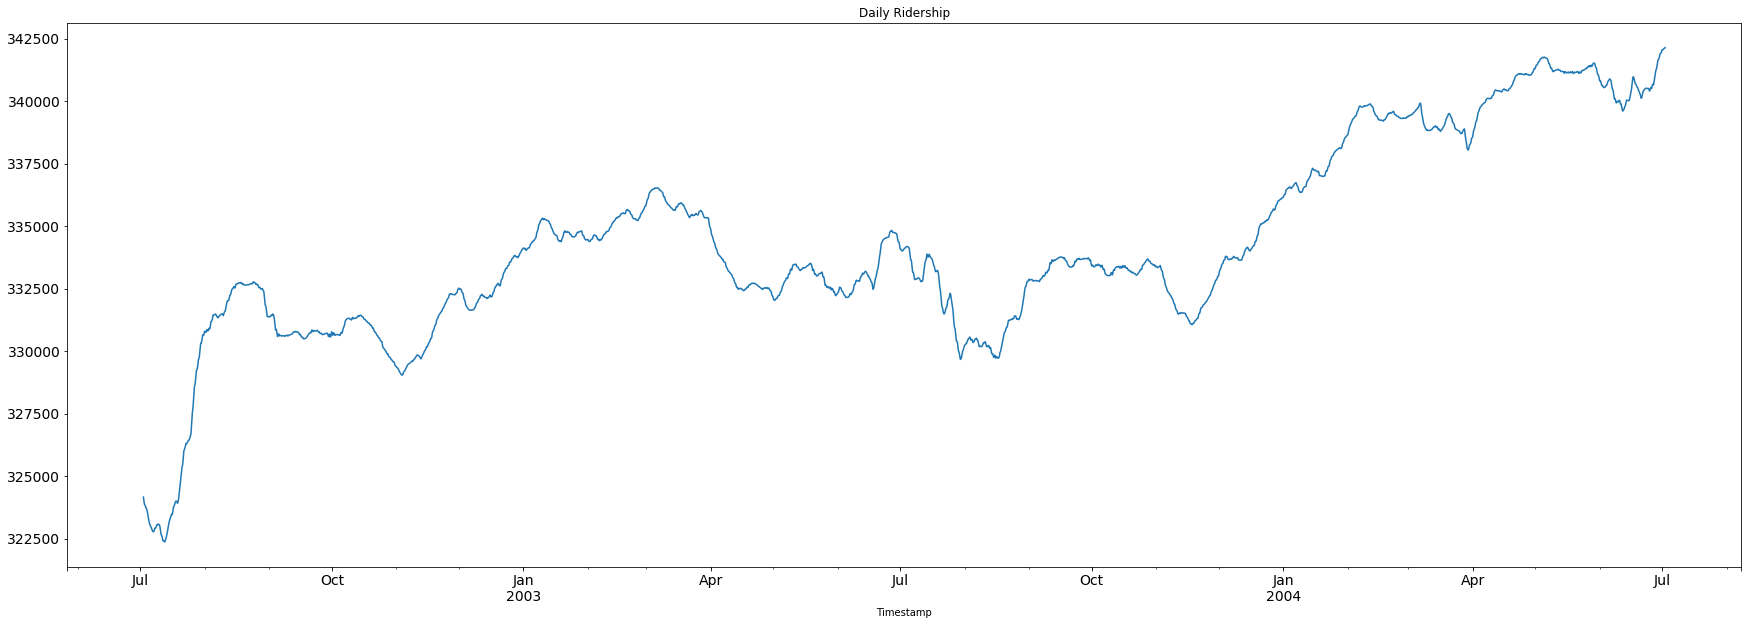

In [61]:
temp['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

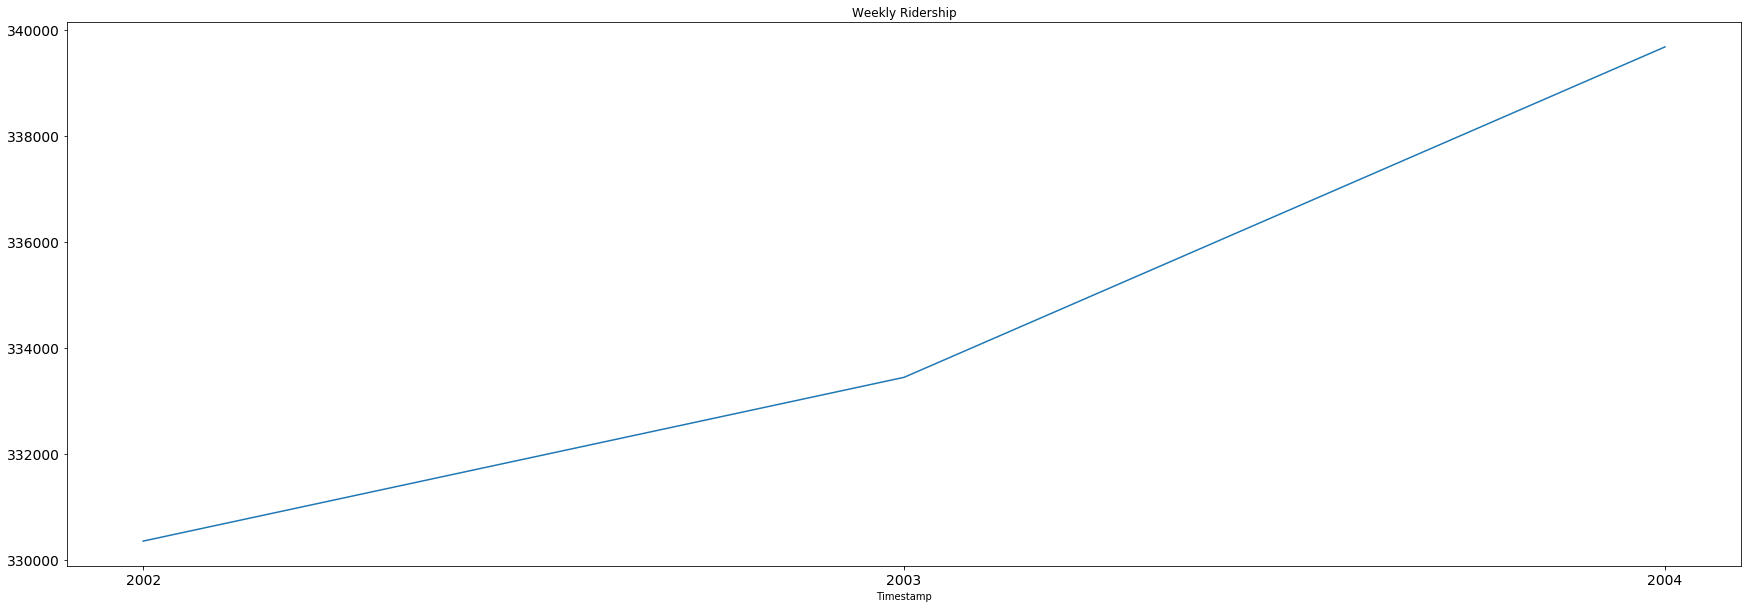

In [68]:
temp2 = temp.copy()
temp2 = temp2.resample('y').mean()
temp2['Load_kW'].plot(figsize=(30,10), title= 'Weekly Ridership', fontsize=14)

In [75]:
temp2

,Load_kW
Timestamp,
2002-12-31,330350.001278
2003-12-31,333439.995741
2004-12-31,339674.744880


In [77]:
slope1 = temp2.iloc[1,0] - temp2.iloc[0,0]
print(slope1)
slope2 = temp2.iloc[2,0] - temp2.iloc[1,0]
print(slope2)

3089.9944628969533
6234.749139162188
